<a href="https://colab.research.google.com/github/radiant2958/Prediction-Bitcoin/blob/main/%D0%9D%D0%A1_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BA%D1%83%D1%80%D1%81%D0%B0_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Котировки криптовалюты Bitcoin - Биткоин за прошлые периоды — Investing.com.csv', index_col=0) # подгружаем данные 

In [ ]:
data.head() # загружаем данные из базы

,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
Дата,,,,,,
01.11.2021,"60.915,3","61.310,1","62.430,1","59.612,7","61,21K","-0,64%"
31.10.2021,"61.309,6","61.842,2","62.393,7","60.005,7","50,06K","-0,86%"
30.10.2021,"61.840,1","62.245,0","62.338,5","60.786,0","40,51K","-0,65%"
29.10.2021,"62.242,8","60.579,9","62.952,2","60.322,2","63,39K","2,74%"
28.10.2021,"60.582,5","58.437,2","62.251,3","58.128,1","88,47K","3,67%"


In [ ]:
data['Цена'] = [x.replace('.', '') for x in data['Цена']]
data['Цена'] = [x.replace(',', '.') for x in data['Цена']]
data['Цена'] = data['Цена'].astype(float)

Убираем лишние знаки и приводим к единому типу данные


In [ ]:
data['Откр.'] = [x.replace('.', '') for x in data['Откр.']]
data['Откр.'] = [x.replace(',', '.') for x in data['Откр.']]
data['Откр.'] = data['Откр.'].astype(float)

In [ ]:
data['Макс.'] = [x.replace('.', '') for x in data['Макс.']] 
data['Макс.'] = [x.replace(',', '.') for x in data['Макс.']] 
data['Макс.'] = data['Макс.'].astype(float)

In [ ]:
data['Мин.'] = [x.replace('.', '') for x in data['Мин.']]
data['Мин.'] = [x.replace(',', '.') for x in data['Мин.']]
data['Мин.'] = data['Мин.'].astype(float)

In [ ]:
data.dtypes

Цена      float64
Откр.     float64
Макс.     float64
Мин.      float64
Объём      object
Изм. %     object
dtype: object

In [ ]:
def voles (data):

    
    vol_lst = data['Объём'].to_list()
    

    add_v = []
    

    for v in vol_lst:
        if v == '-':
            add_v.append(0)
        else:
            add = re.sub(r',', '.',v)
            add_v.append(add)
           
    return add_v

def convertV(v):
  vol_lst = v
  add_v = []
  for v in vol_lst:
        if v == '-':
            add_v.append(0)
        else:
            exam = re.findall(r'K',v)
            if len(exam)>0:
                add = re.sub(r'K', '',v)
                add = float(add)
                add *= 1000
                add_v.append(add)
            else:
                add = re.sub(r'M', '',v)
                add = float(add)
                add *= 1000000
                add_v.append(add)
  return add_v


In [ ]:
v=voles(data)
Vol = convertV(v)
data['Объём'] = Vol

In [ ]:
def change(data):
  change_lst = data['Изм. %'].to_list()
  add_ch = []
  for i in change_lst:
        add = re.sub(r'%', '',i)
        add_ch.append(add)
  return add_ch

In [ ]:
ch=change(data)

In [ ]:
data['Изм. %']=ch
data['Изм. %'] = [x.replace(',', '.') for x in data['Изм. %']] 
data['Изм. %'] = data['Изм. %'].astype(float)

Проверяем данные 

In [ ]:
data.head()

,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
Дата,,,,,,
01.11.2021,60915.3,61310.1,62430.1,59612.7,61210.0,-0.64
31.10.2021,61309.6,61842.2,62393.7,60005.7,50060.0,-0.86
30.10.2021,61840.1,62245.0,62338.5,60786.0,40510.0,-0.65
29.10.2021,62242.8,60579.9,62952.2,60322.2,63390.0,2.74
28.10.2021,60582.5,58437.2,62251.3,58128.1,88470.0,3.67


In [ ]:
data.dtypes 

Цена      float64
Откр.     float64
Макс.     float64
Мин.      float64
Объём     float64
Изм. %    float64
dtype: object

Делим данные на обучающие и тренировочные выбоки

In [ ]:
Xtrain= np.array(data[['Откр.','Макс.','Мин.','Объём','Изм. %']])
Ytrain= np.array(data['Цена'])

In [ ]:
x_train,x_test,y_train,y_tast= train_test_split(Xtrain,Ytrain, test_size=0.10)

In [ ]:
x_train.size

16165

In [ ]:
y_train.size

3233

Простая нейронная сеть 


In [ ]:
# Обучаем модель полученными данными
model=Sequential()
model.add(Dense(250, input_dim=5, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])


In [ ]:
history=model.fit(x_train,y_train,
                  batch_size=50,
                  epochs=100,
                  validation_data=(x_test,y_tast),
                  verbose=1,shuffle=True)

Epoch 1/100
65/65 [==============================] - 1s 4ms/step - loss: 4146230784.0000 - mae: 17857.5762 - val_loss: 676303680.0000 - val_mae: 10789.0293
Epoch 2/100
65/65 [==============================] - 0s 2ms/step - loss: 503652608.0000 - mae: 6078.5894 - val_loss: 21890980.0000 - val_mae: 2350.3003
Epoch 3/100
65/65 [==============================] - 0s 2ms/step - loss: 10509488.0000 - mae: 1213.9556 - val_loss: 1464381.1250 - val_mae: 638.5609
Epoch 4/100
65/65 [==============================] - 0s 2ms/step - loss: 92131848.0000 - mae: 2775.4680 - val_loss: 85021064.0000 - val_mae: 3549.3447
Epoch 5/100
65/65 [==============================] - 0s 2ms/step - loss: 36204096.0000 - mae: 1739.0807 - val_loss: 19778860.0000 - val_mae: 1472.5292
Epoch 6/100
65/65 [==============================] - 0s 2ms/step - loss: 93825024.0000 - mae: 2293.6492 - val_loss: 12985847.0000 - val_mae: 1507.6575
Epoch 7/100
65/65 [==============================] - 0s 2ms/step - loss: 33778660.0000 - m

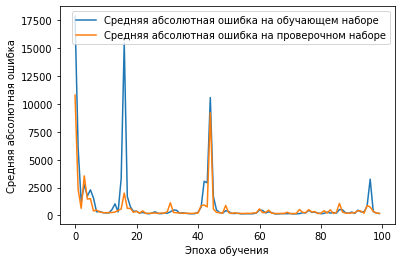

In [ ]:
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

Оценка результатов

In [ ]:
pred = model.predict(x_test)
for i in range(len(pred[:10])):
  print("Сеть : ", pred[i], ", а верный ответ: ", y_tast[i], ", разница: ", pred[i] - y_tast[i])

12/12 [==============================] - 0s 1ms/step
Сеть :  [47571.938] , а верный ответ:  47936.3 , разница:  [-364.36328]
Сеть :  [8706.465] , а верный ответ:  8923.1 , разница:  [-216.63477]
Сеть :  [12.921028] , а верный ответ:  46.8 , разница:  [-33.87897]
Сеть :  [33692.11] , а верный ответ:  33824.8 , разница:  [-132.6914]
Сеть :  [9685.175] , а верный ответ:  10172.7 , разница:  [-487.5254]
Сеть :  [2531.2126] , а верный ответ:  2617.3 , разница:  [-86.0874]
Сеть :  [688.5028] , а верный ответ:  741.1 , разница:  [-52.597168]
Сеть :  [-40.549515] , а верный ответ:  10.9 , разница:  [-51.449516]
Сеть :  [114.17011] , а верный ответ:  132.3 , разница:  [-18.12989]
Сеть :  [37412.53] , а верный ответ:  36845.8 , разница:  [566.73047]


Тема-'Прогнозирование Bitcoin'.
Вывод: большое значение ошибки 
план работы: сделать нормализацию данных, работа с архитектурой сети 
